<a href="https://colab.research.google.com/github/Subhasree456/Week1-StudentPerformance-EDA/blob/main/%20COVID-19%20Data%20Analysis-EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

📂 Please upload owid-covid-data.csv


Saving owid-covid-data.csv to owid-covid-data.csv
✅ Uploaded file: owid-covid-data.csv

First 5 rows of dataset:
         date       location  total_cases  new_cases  total_deaths  \
0  2020-03-01          India            3          3             0   
1  2020-03-01  United States           75         20             1   
2  2020-03-01         Brazil            2          2             0   
3  2020-06-01          India       190000       8000          5400   
4  2020-06-01  United States      1800000      22000        105000   

   population      continent  
0  1380004385           Asia  
1   331002651  North America  
2   212559417  South America  
3  1380004385           Asia  
4   331002651  North America  


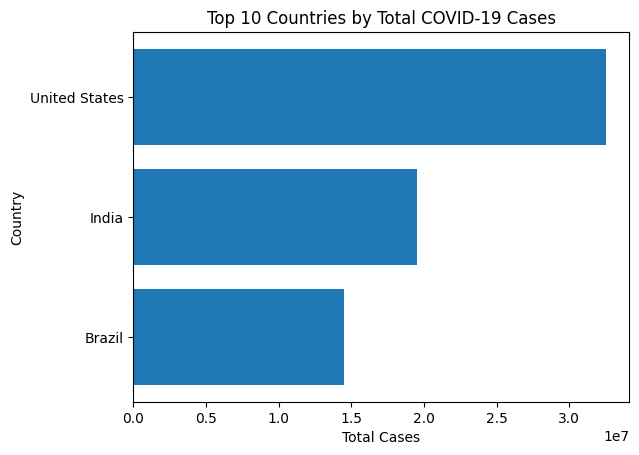

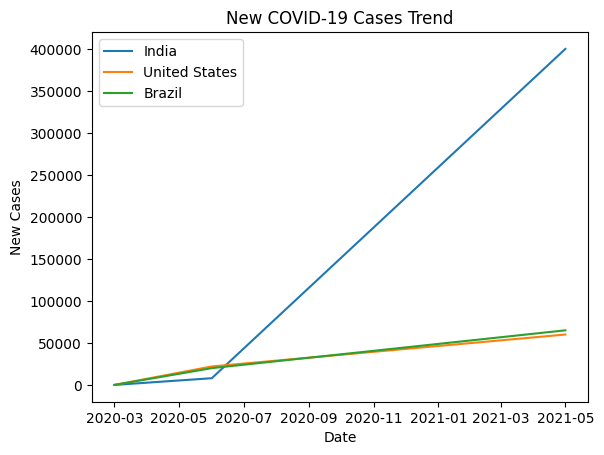

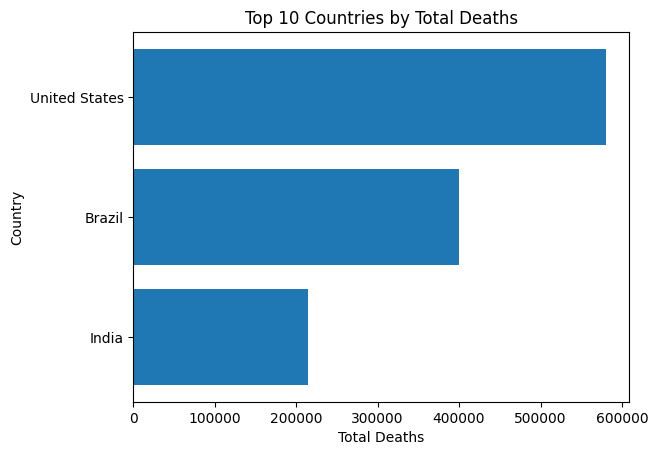

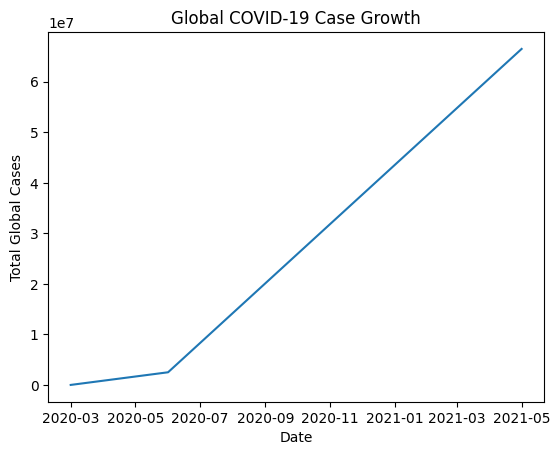

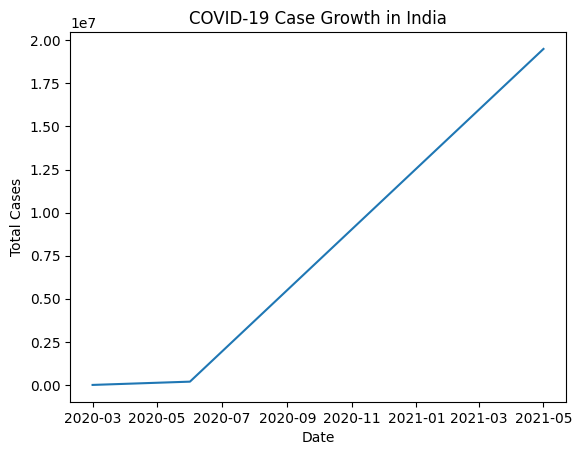


Sample Death Rate Output:
        location  death_rate
0          India    0.000000
1  United States    1.333333
2         Brazil    0.000000
3          India    2.842105
4  United States    5.833333

✅ PROGRAM EXECUTED SUCCESSFULLY


In [ ]:
# =====================================
# COVID-19 DATA ANALYSIS - WEEK 3
# =====================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import os

# 1. UPLOAD CSV FILE
print("📂 Please upload owid-covid-data.csv")
uploaded = files.upload()

# Get uploaded filename automatically
filename = list(uploaded.keys())[0]
print("✅ Uploaded file:", filename)

# 2. LOAD DATA
df = pd.read_csv(filename)
print("\nFirst 5 rows of dataset:")
print(df.head())

# 3. SELECT REQUIRED COLUMNS
df = df[['date', 'location', 'total_cases', 'new_cases',
         'total_deaths', 'population', 'continent']]

# 4. DATA CLEANING
df['date'] = pd.to_datetime(df['date'])
df = df.dropna(subset=['continent'])
df = df.fillna(0)

# 5. TOP 10 COUNTRIES BY TOTAL CASES
latest_date = df['date'].max()
latest = df[df['date'] == latest_date]

top10_cases = latest.sort_values(
    by='total_cases', ascending=False
).head(10)

plt.figure()
plt.barh(top10_cases['location'], top10_cases['total_cases'])
plt.xlabel("Total Cases")
plt.ylabel("Country")
plt.title("Top 10 Countries by Total COVID-19 Cases")
plt.gca().invert_yaxis()
plt.show()

# 6. NEW CASES TREND (INDIA, USA, BRAZIL)
countries = ['India', 'United States', 'Brazil']

plt.figure()
for c in countries:
    temp = df[df['location'] == c]
    plt.plot(temp['date'], temp['new_cases'], label=c)

plt.xlabel("Date")
plt.ylabel("New Cases")
plt.title("New COVID-19 Cases Trend")
plt.legend()
plt.show()

# 7. TOTAL DEATHS COMPARISON (TOP 10)
top10_deaths = latest.sort_values(
    by='total_deaths', ascending=False
).head(10)

plt.figure()
plt.barh(top10_deaths['location'], top10_deaths['total_deaths'])
plt.xlabel("Total Deaths")
plt.ylabel("Country")
plt.title("Top 10 Countries by Total Deaths")
plt.gca().invert_yaxis()
plt.show()

# 8. GLOBAL CASE GROWTH
global_cases = df.groupby('date')['total_cases'].sum()

plt.figure()
plt.plot(global_cases.index, global_cases.values)
plt.xlabel("Date")
plt.ylabel("Total Global Cases")
plt.title("Global COVID-19 Case Growth")
plt.show()

# 9. INDIA CASE GROWTH
india = df[df['location'] == 'India']

plt.figure()
plt.plot(india['date'], india['total_cases'])
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.title("COVID-19 Case Growth in India")
plt.show()

# 10. BONUS: DEATH RATE
df['death_rate'] = (df['total_deaths'] / df['total_cases']) * 100
df['death_rate'] = df['death_rate'].replace([np.inf, -np.inf], 0)

print("\nSample Death Rate Output:")
print(df[['location', 'death_rate']].head())

print("\n✅ PROGRAM EXECUTED SUCCESSFULLY")

